# Testing new composite code
this should be used to 

In [11]:
# Read in an AGN template
# Read in all required libraries
# Import in all of the required libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# In addition also use astSED to create filters
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

# Load the filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [13]:
# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

# Swire templates
swire_folderpath = os.path.join('datasets', 'Templates', 'SWIRE')

In [14]:
# Read in the AGN templates
type1_agn, type1_params = create_type1_skirtor_agn(skirtor_folderpath)
type2_agn, type2_params = create_type2_skirtor_agn(skirtor_folderpath)

# Read in the template set of choice
swire_templates, template_names = read_swire_templates(swire_folderpath)

In [15]:
# Setup how many alpha values we want to explore
alpha_values = np.linspace(0, 1, 11)
print(alpha_values)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [16]:
composites = generate_composite_set(type1_agn, swire_templates, alpha_values)

In [17]:
# Generate the UVJ colours
uv, vj = generate_UVJ_composite_set_colours(composites, alpha_values, pb_U, pb_V, pb_J)


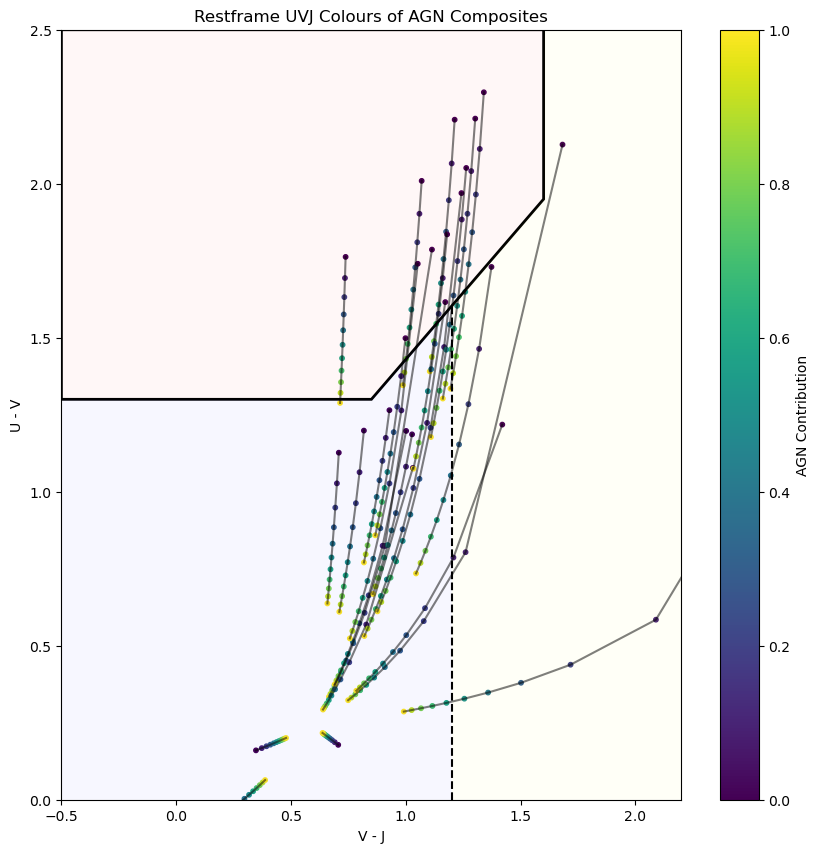

In [18]:
uv_cols = []
vj_cols = []

plt.figure(figsize=(10, 10))
for i in range(len(composites[0])):
    # Plot for this particular composite i, all of the associated alpha values
    for j in range(len(alpha_values)):
        # where uv[i][j] is the U - V colour of the ith composite, with the jth alpha value
        # and vj[i][j] is the V - J colour of the ith composite, with the jth alpha value

        
        # add all of the composites into a list
        uv_cols.append(uv[j][i])
        vj_cols.append(vj[j][i])
        
        # Plot a connecting line
        #if j != 0:
            #plt.plot([vj[i][j-1], vj[i][j]], [uv[i][j-1], uv[i][j]], color='black', alpha=alpha_values[j])
    plt.scatter(vj_cols, uv_cols, c=alpha_values, s=10)
    plt.plot(vj_cols, uv_cols, color='black', alpha=0.5)
    uv_cols = []
    vj_cols = []
    # Plotting a connecting line only between the first and last point of a particular composite
    
    
plt.colorbar().set_label('AGN Contribution')
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
#plt.colorbar().set_label('AGN Contribution')
    
    # Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


plt.show()



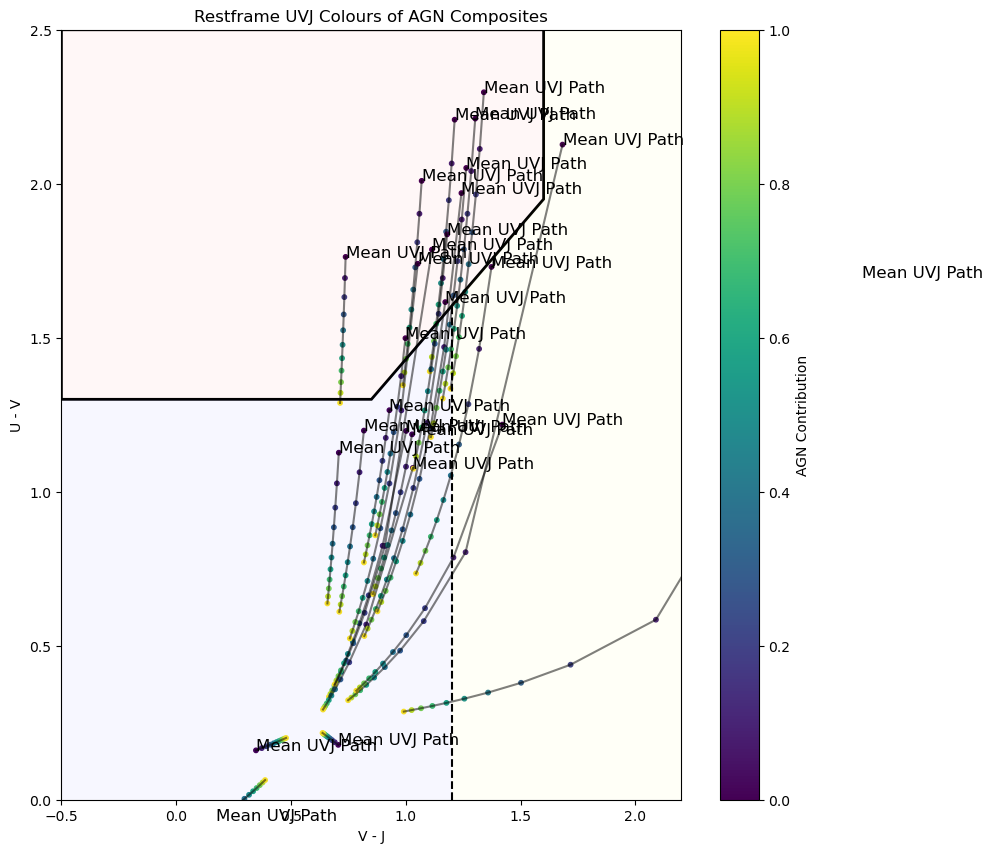

([[1.7861244110313166,
   -0.06747847096729132,
   2.2079298755335337,
   1.762443803439787,
   2.009313667740642,
   2.127082071511783,
   1.1973898187225984,
   1.0772319582818675,
   1.6156730430404913,
   1.217950721714324,
   1.969591497695344,
   1.7401276820036244,
   0.16024183888873367,
   1.1267571507054548,
   2.296887715385708,
   2.2114524414797323,
   2.0512148777466024,
   1.8355789845284143,
   1.2646472489086307,
   1.4984666294008306,
   1.1862591074564293,
   1.7298359303603839,
   1.1984526652285545,
   1.696052429070022,
   0.17810104546238037],
  [0.8238674454496078,
   -0.04615614238632659,
   2.065785583099217,
   1.6938012879535371,
   1.9025057974202078,
   0.8036577217213079,
   0.8246401325497565,
   0.5688664383855055,
   1.2233951987414997,
   0.786308123334674,
   1.4697177722397363,
   1.2640026162239337,
   0.16751610430139507,
   1.027179860472227,
   2.112979372051555,
   2.041002405076938,
   1.883720960107265,
   1.6936183134039666,
   1.17483262844

In [19]:
# Use the quickplotting tool to plot the UVJ diagram <- This tool can be useful for quickplotting of composites in UVJ space.
plot_uvj_composite_set(composites, template_names ,alpha_values, pb_U, pb_V, pb_J, path=True)

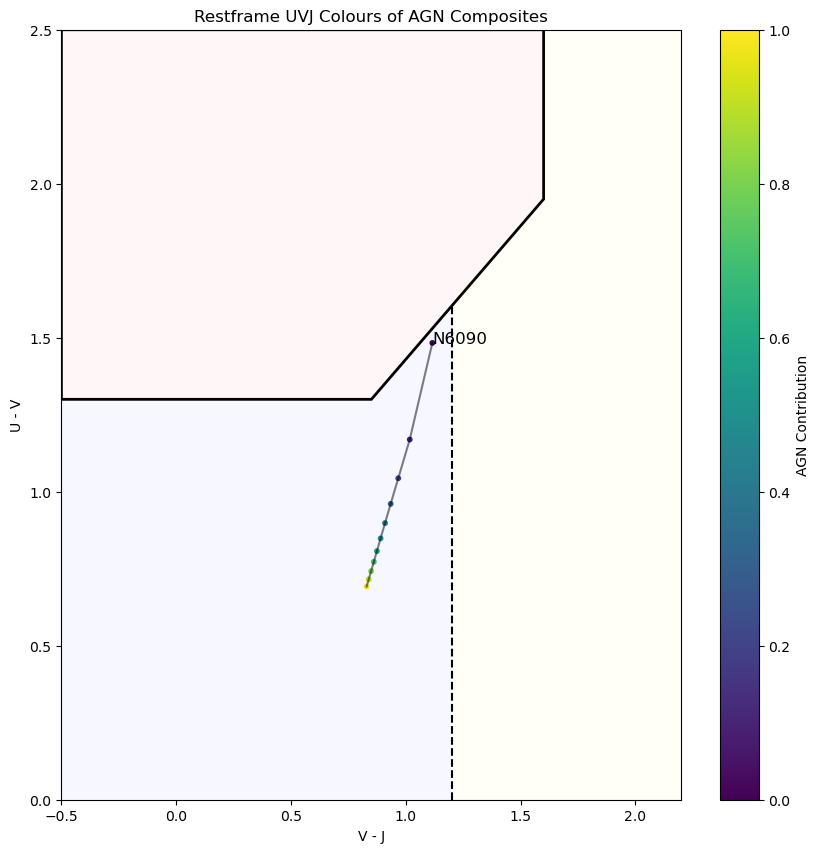

In [20]:
plot_mean_uvj_composite_set(composites, template_names ,alpha_values, pb_U, pb_V, pb_J, path=True)